# Chapter 63: Kernel Methods

### This code generates figures 7, 9, 10, 11, and 12 in Chapter 63: Kernel Methods (vol. III)
TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Eduardo Faria Cabrera

required libraries:
    
1. numpy
2. matplotlib
3. scipy

The other ones are not necessary

In [190]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from tqdm import tqdm

## Example 63.5 (Relation to nearest-neighbor rule)

Expression (63.36) for the separation surface has a useful interpretation. Assume we are using the Gaussian kernel (63.25) with variance $\sigma^2$. Then, the function $1+K(h,h_m)$ describes a raised Gaussian "bump" that is centered at feature vector $h_m$ with spread dictated by the parameter $\sigma^2$ --- see Fig.63.6. In this way, expression (63.36) amounts to the following construction. We center a Gaussian "bump" at each training feature vector, $h_m$, with some of these "bumps" scaled by $+1$ and others by $-1$ depending on the value of $\gamma(m)$. Subsequently, we combine all bumps with weights $\{a(m)\}$. The resulting curve will be the desired separation surface. For any test feature vector $h$, we determine its class variable by deciding whether it lies on one side of this surface or the other by combining the contributions of the Gaussian bumps according to (63.33) and using (63.34).

In [191]:
# Gaussian kernels and NN rules
N = 100 # number of points
x = np.random.rand(N)
y = np.random.rand(N)

xtr = np.zeros(N)
ytr = np.zeros(N)
xtg = np.zeros(N)
ytg = np.zeros(N)

gamma = np.zeros(N)

for m in range(N): # assigning classes 1, 2 or 3 to these 100 points
    a = np.random.rand()
    if a <= 1/2:
        gamma[m] = +1
        xtg[m] = x[m] # class +1 will be colored green
        ytg[m] = y[m]
    else:
        gamma[m] = -1
        xtr[m] = x[m]
        ytr[m] = y[m]

# Simulating one value for sigma^2
sigma2 = 0.01

ix = 0
iy = 0

KG = np.zeros(N)

xx_range = np.arange(0, 1, 0.005)
yy_range = np.arange(0, 1, 0.005)

class_ = np.zeros((xx_range.shape[0], yy_range.shape[0]))
xg = np.zeros((xx_range.shape[0], yy_range.shape[0]))
yg = np.zeros((xx_range.shape[0], yy_range.shape[0]))
xr = np.zeros((xx_range.shape[0], yy_range.shape[0]))
yr = np.zeros((xx_range.shape[0], yy_range.shape[0]))

for xx in xx_range: # comb the plane with a fine resolution
    for yy in yy_range:
        S = 0
        for m in range(N):
            KG[m] = (x[m]-xx)**2 + (y[m]-yy)**2 # squared distance
            KG[m] = -KG[m] / (2*sigma2)
            KG[m] = np.exp(KG[m]) # Gaussian kernel
            S += gamma[m]*KG[m]
        hat_gamma = S
        if hat_gamma >= 0:
            class_[ix, iy] = +1
            xg[ix, iy] = xx # green point
            yg[ix, iy] = yy 
        else:
            class_[ix, iy] = -1
            xr[ix, iy] = xx # red point
            yr[ix, iy] = yy 
        iy += 1
    iy = 0
    ix += 1

# Simulating another value for sigma^2
sigma2 = 0.001

ix = 0
iy = 0

KG = np.zeros(N)

xx_range = np.arange(0, 1, 0.005)
yy_range = np.arange(0, 1, 0.005)

class_ = np.zeros((xx_range.shape[0], yy_range.shape[0]))
xg_ = np.zeros((xx_range.shape[0], yy_range.shape[0]))
yg_ = np.zeros((xx_range.shape[0], yy_range.shape[0]))
xr_ = np.zeros((xx_range.shape[0], yy_range.shape[0]))
yr_ = np.zeros((xx_range.shape[0], yy_range.shape[0]))

for xx in xx_range: # comb the plane with a fine resolution
    for yy in yy_range:
        S = 0
        for m in range(N):
            KG[m] = (x[m]-xx)**2 + (y[m]-yy)**2 # squared distance
            KG[m] = -KG[m] / (2*sigma2)
            KG[m] = np.exp(KG[m]) # Gaussian kernel
            S += gamma[m]*KG[m]
        hat_gamma = S
        if hat_gamma >= 0:
            class_[ix, iy] = +1
            xg_[ix, iy] = xx # green point
            yg_[ix, iy] = yy 
        else:
            class_[ix, iy] = -1
            xr_[ix, iy] = xx # red point
            yr_[ix, iy] = yy 
        iy += 1
    iy = 0
    ix += 1


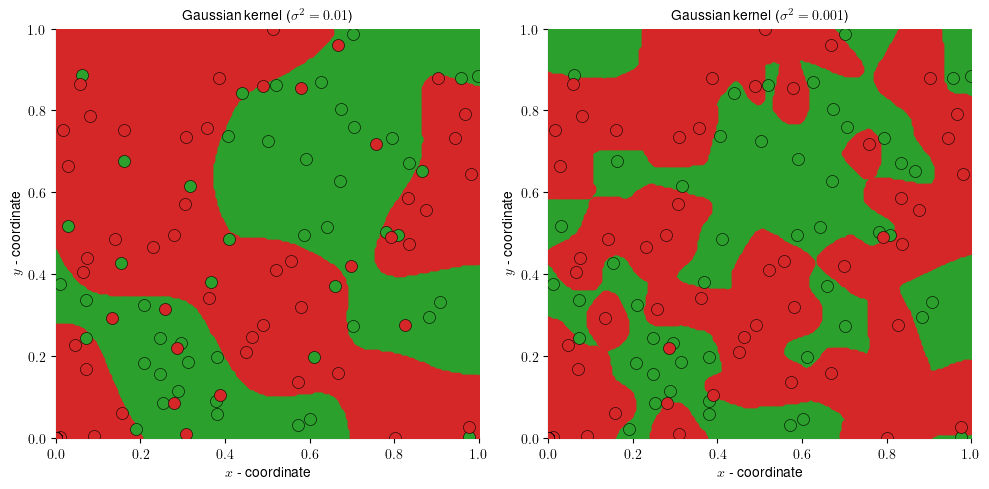

In [192]:
# figure 7 (Gaussian kernel and NN)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=10, 5
fig = plt.figure()

ax = fig.add_subplot(121)
ax.scatter(xg, yg, zorder=3, c="tab:green")
ax.scatter(xr, yr, zorder=3, c="tab:red")
ax.scatter(xtg, ytg, zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75)
ax.scatter(xtr, ytr, zorder=3, c="tab:red", edgecolor="black", linewidth=0.4, s=75)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_xlabel("$x$ - coordinate", fontsize=10)
ax.set_ylabel("$y$ - coordinate", fontsize=10)
ax.set_title("Gaussian kernel ($\sigma^2=0.01$)", fontsize=10)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(122)
ax.scatter(xg_, yg_, zorder=3, c="tab:green")
ax.scatter(xr_, yr_, zorder=3, c="tab:red")
ax.scatter(xtg, ytg, zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75)
ax.scatter(xtr, ytr, zorder=3, c="tab:red", edgecolor="black", linewidth=0.4, s=75)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_xlabel("$x$ - coordinate", fontsize=10)
ax.set_ylabel("$y$ - coordinate", fontsize=10)
ax.set_title("Gaussian kernel ($\sigma^2=0.001$)", fontsize=10)
ax.spines[['right', 'top']].set_visible(False)

plt.tight_layout()

plt.savefig("figs/fig-7.pdf", format="pdf", bbox_inches="tight")

plt.show()

**Figure 63.7** Classification regions obtained by combining Gaussian kernels centered at all training vectors according to  construction (63.36) for two cases: $\sigma^2=0.01$ ($\textit{left}$) and $\sigma^2=0.001$ ($\textit{right}$).

This construction can be viewed as a kernel-based form of the nearest-neighbor (NN) rule. For instance, if the parameter $\sigma^2$ happens to be very small, then the Gaussian bumps will be highly concentrated around their centers and their influence will decay rapidly in space. In this extreme situation, given an arbitrary feature point $h\in\real^{M}$, the value of the sum (63.33) will be mainly dictated by the Gaussian kernel centered at the vector $h_m$ that is closest to $h$ (a type of behavior that approaches that of $1-$ NN solutions). We illustrate this behavior in Fig. 63.7 for the two choices $\sigma^2=0.01$ ($\textit{left}$) and $\sigma^2=0.001$ ($\textit{right}$). In both cases, a total of $N=100$ random points are generated in the region $[0,1]\times [0,1]$. In these plots, it is assumed for illustration purposes that $a(m)=1$ for all training data so that all training vectors contribute to the classification decision. For any point $h$ in the plane, the estimated class variable is computed via (63.33) under the condition $a(m)= 1$, and subsequently assigned the red color (for class $-1$) or the green color (for class $+1$) according to (63.34). Obviously, in an actual perceptron implementation (63.32), only the misclassified data contributes  to (63.33) and its contribution is weighted by the respective scalars $\{a(m)\}$. We will explain later in the argument leading to (63.144) how this interpretation is related to the solution of regression problems using Gaussian processes.

## Example 63.6 (Binary classification using kernel-based SVM)

We show in the two rows of  Fig. 63.9 a collection of $400$ feature points $h_n\in\real^{2}$ whose classes $\pm 1$ are known beforehand. We divide this data into a training set (with $320$ points) and a test set (with $80$ points). In the top row, the classes are separated by a circular curve, while in the bottom row the classes are separated by another nonlinear curve. We use the training data to construct two SVM classifiers and to assess their empirical error rates on the test data. We use a Gaussian kernel with $\sigma^2=1$ and train the kernel-based SVM classifier (63.55) using $\rho=5$, $\mu=0.1$, and $40$ passes over the data. The curves in the figure show the resulting separating curves from (63.54).  The resulting empirical error rates are $5\%$ in the top row and $10\%$ in the bottom row.

In [193]:
# Testing kernel-based SVM on non-separable data
circularity_data = scipy.io.loadmat("data/circularly_separable_data.mat") # loads a matrix B3; each row is h with 2 features plus class +1 or -1 (separated by a circle)
nonlinearly_data = scipy.io.loadmat("data/nonlinearly_separable_data_III.mat") # loads a matrix B4; each row is h with 2 features plus class +1 or -1 (separated by a nonlinear curve)

B3 = circularity_data["B3"]
B4 = nonlinearly_data["B4"]

C5 = B3[:, 2]
C6 = B4[:, 2]

# Running KERNEL-BASED SVM on the circularly separable a data B3
N = max(B3.shape) # total number of data points
N_test = round(0.2*N) # number of test data separated for testing (20%)
B3_test = B3[N-N_test:N]
B3_train = B3[:N-N_test]
N_train = max(B3_train.shape)

rho = 5
mu = 0.1
sigma2 = 1 # variance Gaussian Kernel
q = np.zeros(N_train)
t = np.zeros(N_train)

time = 0
number_of_passes = 40 # number of passes over data
P = np.arange(N_train) # first pass
for p in range(number_of_passes):
    for n in range(N_train):
        hn = B3_train[P[n], :2] # original 2-dimensional feature vector
        gamma = B3_train[P[n], 2] # its class
        sum_ = 0
        for m in range(N_train):
            hm = B3_train[m, :2] # feature vector (it is a row here and extended by adding one)
            gamma_m = B3_train[m, 2]
            r = 1/(2*sigma2)
            r = r*(np.linalg.norm(hn-hm, 2)**2)
            K = np.exp(-r) # Gaussian Kernel
            sum_ += mu*gamma_m*(t[m]+q[m]*K)
        gamma_hat = sum_
        q[P[n]] = (1-mu*rho)*q[P[n]]
        if gamma*gamma_hat <= 1:
            q[P[n]] += 1
            t[P[n]] += 1
        time += 1
    P = np.random.permutation(N_train)

error = 0
for n in range(N_test):
    hn = B3_test[n, :2] # feature vector
    gamma = B3_test[n, 2] # its class
    sum_ = 0
    for m in range(N_train):
        hm = B3_train[m, :2] # feature vector (it is a row here extended by adding one)
        gamma_m = B3_train[m, 2]
        r = 1/(2*sigma2)
        r = r*(np.linalg.norm(hn-hm, 2)**2)
        K = np.exp(-r) # Gaussian Kernel
        sum_ += mu*gamma_m*(t[m] + q[m]*K)
    gamma_hat = sum_ 
    if gamma*gamma_hat <= 0:
        error += 1

print("Circulary separable data B3")
print("Empirical error rate for Kernel-based SVM (%): ", (error/N_test)*100)

# Generating the separating curve
rr = 0
z1_range = np.arange(-2.5, 2.5, 0.2)
z2_range = np.arange(-2.5, 2.5, 0.2)

surf8 = np.zeros((z1_range.shape[0]*z2_range.shape[0], 3))

for z1 in z1_range:
    for z2 in z2_range:
        sum_ = 0
        h = np.array([z1, z2])
        for n in range(N_train):
            hn = B3_train[n, :2] # feature vector (it is a row here and extended by adding one)
            gamma_n = B3_train[n, 2]
            r = 1/(2*sigma2)
            r = r*(np.linalg.norm(h-hn, 2)**2)
            K = np.exp(-r) # Gaussian Kernel
            sum_ += mu*gamma_n*(t[n]+q[n]*K)
        surf8[rr] = np.array([z1, z2, sum_])
        rr += 1 # row index

N = max(B3_train.shape)
C = B3_train[:, 2] # color map
C_test = B3_test[:, 2]

B3_train_0 = (B3_train[np.argwhere(C.reshape(-1) == -1)]).reshape(-1, 3)
B3_train_1 = (B3_train[np.argwhere(C.reshape(-1) == 1)]).reshape(-1, 3)

B3_test_0 = (B3_test[np.argwhere(C_test.reshape(-1) == -1)]).reshape(-1, 3)
B3_test_1 = (B3_test[np.argwhere(C_test.reshape(-1) == 1)]).reshape(-1, 3)

Z1grid, Z2grid = np.meshgrid(z1_range, z2_range)

Circulary separable data B3
Empirical error rate for Kernel-based SVM (%):  6.25


In [207]:

# Running KERNEL-BASED SVM on the nonlinearly separable data B4
N = max(B4.shape) # total number of data points
N_test = round(0.2*N) # number of test data separated for testing (20%)
B4_test = B4[N-N_test:N]
B4_train = B4[:N-N_test]
N_train = max(B4_train.shape)

rho = 5
mu = 0.1
sigma2 = 1 # variance Gaussian Kernel
q = np.zeros(N_train)
t = np.zeros(N_train)

time = 0
number_of_passes = 40 # number of passes over data
P = np.arange(N_train) # first pass
for p in range(number_of_passes):
    for n in range(N_train):
        hn = B4_train[P[n], :2] # original 2-dimensional feature vector
        gamma = B4_train[P[n], 2] # its class
        sum_ = 0
        for m in range(N_train):
            hm = B4_train[m, :2] # feature vector (it is a row here and extended by adding one)
            gamma_m = B4_train[m, 2]
            r = 1/(2*sigma2)
            r = r*(np.linalg.norm(hn-hm, 2)**2)
            K = np.exp(-r) # Gaussian Kernel
            sum_ += mu*gamma_m*(t[m]+q[m]*K)
        gamma_hat = sum_
        q[P[n]] = (1-mu*rho)*q[P[n]]
        if gamma*gamma_hat <= 1:
            q[P[n]] += 1
            t[P[n]] += 1
        time += 1
    P = np.random.permutation(N_train)

error = 0
for n in range(N_test):
    hn = B4_test[n, :2] # feature vector
    gamma = B4_test[n, 2] # its class
    sum_ = 0
    for m in range(N_train):
        hm = B4_train[m, :2] # feature vector (it is a row here extended by adding one)
        gamma_m = B4_train[m, 2]
        r = 1/(2*sigma2)
        r = r*(np.linalg.norm(hn-hm, 2)**2)
        K = np.exp(-r) # Gaussian Kernel
        sum_ += mu*gamma_m*(t[m] + q[m]*K)
    gamma_hat = sum_ 
    if gamma*gamma_hat <= 0:
        error += 1

print("Non-linearly separable data B4")
print("Empirical error rate for Kernel-based SVM (%): ", (error/N_test)*100)

# Generating the separating curve
rr = 0
z1_range_4 = np.arange(-1, 2, 0.05)
z2_range_4 = np.arange(-2, 2, 0.1)

surf8_4 = np.zeros((z1_range_4.shape[0]*z2_range_4.shape[0], 3))

for z1 in z1_range_4:
    for z2 in z2_range_4:
        sum_ = 0
        h = np.array([z1, z2])
        for n in range(N_train):
            hn = B4_train[n, :2] # feature vector (it is a row here and extended by adding one)
            gamma_n = B4_train[n, 2]
            r = 1/(2*sigma2)
            r = r*(np.linalg.norm(h-hn, 2)**2)
            K = np.exp(-r) # Gaussian Kernel
            sum_ += mu*gamma_n*(t[n]+q[n]*K)
        surf8_4[rr] = np.array([z1, z2, sum_])
        rr += 1 # row index

N = max(B4_train.shape)
C = B4_train[:, 2] # color map
C_test = B4_test[:, 2]

B4_train_0 = (B4_train[np.argwhere(C.reshape(-1) == -1)]).reshape(-1, 3)
B4_train_1 = (B4_train[np.argwhere(C.reshape(-1) == 1)]).reshape(-1, 3)

B4_test_0 = (B4_test[np.argwhere(C_test.reshape(-1) == -1)]).reshape(-1, 3)
B4_test_1 = (B4_test[np.argwhere(C_test.reshape(-1) == 1)]).reshape(-1, 3)

Z1grid_4, Z2grid_4 = np.meshgrid(z1_range_4, z2_range_4)

Non-linearly separable data B4
Empirical error rate for Kernel-based SVM (%):  10.0


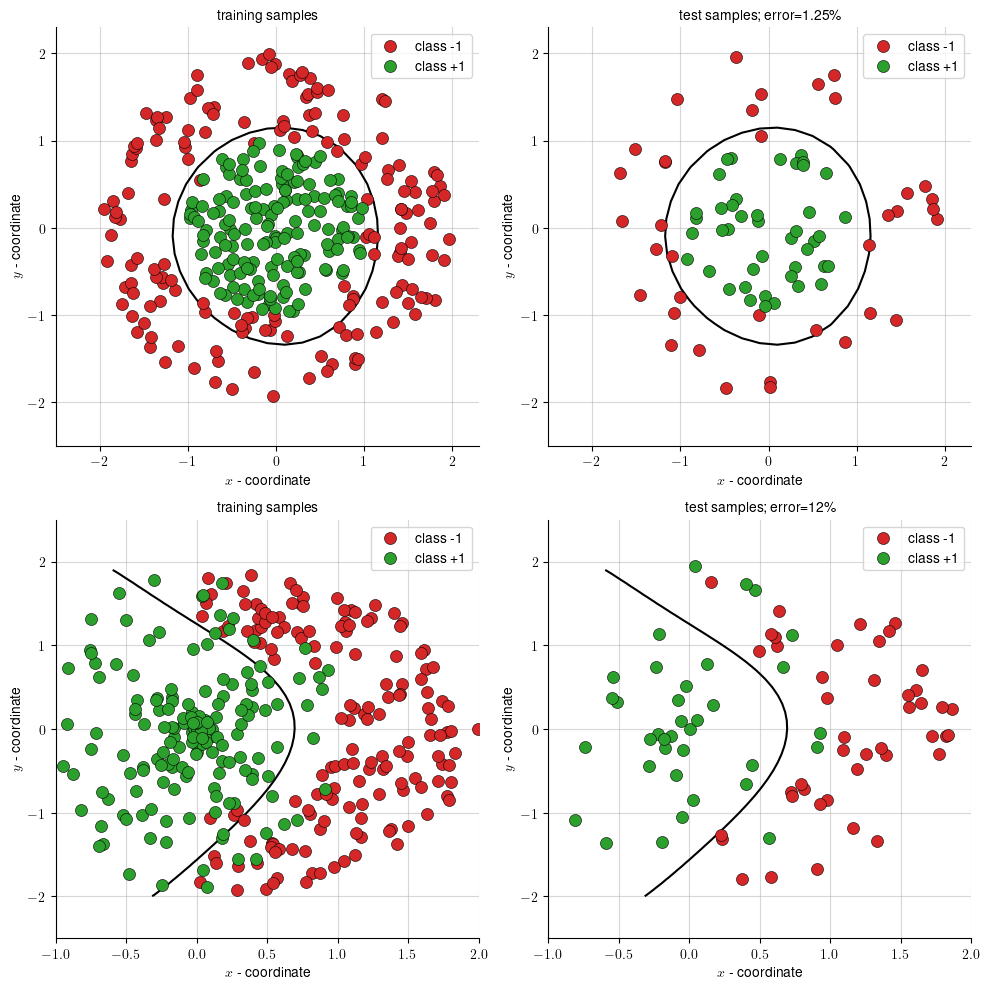

In [208]:
# figure 9 (SVM applied to circular and nonlinear separation regions)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=10, 10
fig = plt.figure()

ax = fig.add_subplot(221)
ax.scatter(B3_train_0[:, 0], B3_train_0[:, 1], zorder=3, c="tab:red", edgecolor="black", linewidth=0.4, s=75, label="class -1")
ax.scatter(B3_train_1[:, 0], B3_train_1[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class +1")
plt.contour(Z1grid, Z2grid, surf8[:, 2].reshape(25, 25), levels=0, colors="black")
ax.set_xlabel("$x$ - coordinate", fontsize=10)
ax.set_ylabel("$y$ - coordinate", fontsize=10)
ax.set_title("training samples", fontsize=10)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

ax = fig.add_subplot(222)
ax.scatter(B3_test_0[:, 0], B3_test_0[:, 1], zorder=3, c="tab:red", edgecolor="black", linewidth=0.4, s=75, label="class -1")
ax.scatter(B3_test_1[:, 0], B3_test_1[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class +1")
plt.contour(Z1grid, Z2grid, surf8[:, 2].reshape(25, 25), levels=0, colors="black")
ax.set_xlabel("$x$ - coordinate", fontsize=10)
ax.set_ylabel("$y$ - coordinate", fontsize=10)
ax.set_title("test samples; error=1.25\%", fontsize=10)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

ax = fig.add_subplot(223)
ax.scatter(B4_train_0[:, 0], B4_train_0[:, 1], zorder=3, c="tab:red", edgecolor="black", linewidth=0.4, s=75, label="class -1")
ax.scatter(B4_train_1[:, 0], B4_train_1[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class +1")
plt.contour(Z1grid_4, Z2grid_4, surf8_4[:, 2].reshape(Z1grid_4.shape, order="F"), levels=0, colors="black")
ax.set_xlim([-1, 2])
ax.set_ylim([-2.5, 2.5])
ax.set_xlabel("$x$ - coordinate", fontsize=10)
ax.set_ylabel("$y$ - coordinate", fontsize=10)
ax.set_title("training samples", fontsize=10)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

ax = fig.add_subplot(224)
ax.scatter(B4_test_0[:, 0], B4_test_0[:, 1], zorder=3, c="tab:red", edgecolor="black", linewidth=0.4, s=75, label="class -1")
ax.scatter(B4_test_1[:, 0], B4_test_1[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class +1")
plt.contour(Z1grid_4, Z2grid_4, surf8_4[:, 2].reshape(Z1grid_4.shape, order="F"), levels=0, colors="black")
ax.set_xlim([-1, 2])
ax.set_ylim([-2.5, 2.5])
ax.set_xlabel("$x$ - coordinate", fontsize=10)
ax.set_ylabel("$y$ - coordinate", fontsize=10)
ax.set_title("test samples; error=12\%", fontsize=10)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

plt.tight_layout()

plt.savefig("figs/fig-9.pdf", format="pdf", bbox_inches="tight")

plt.show()

**Figure 63.9** The first row shows the training and test data for a kernel-based SVM classifier used to determine a circular separation curve. The second row shows training and test data for a second kernel-based SVM classifier used to determine a nonlinear separation curve. Both classifiers employ a Gaussian kernel with $\sigma^2=1$. 

## Example 63.7 (Selecting the regularization parameter via cross validation)

We illustrate how to apply the cross validation procedure from Section 61.3 to the selection of the regularization parameter $\rho$ in the kernel-based implementation of the SVM learner from the previous example.
 
In the lower plot of Fig. 63.9 we employed SVM to determine a nonlinear separation curve using a Gaussian kernel and $\rho=5$. We reconsider this case and generate a plot of the empirical error rate for the SVM learner against the regularization parameter, $\rho$. We start with  $N=320$ training data points and implement a five-fold cross validation scheme. That is, we set $K=5$ and divide this training data into $5$ segments of $64$ samples each. We fix $\rho$ at one particular value, and run SVM on four of the segments while keeping the fifth segment for testing; this fifth segment generates an empirical error value. While running the algorithm on the four segments, we run it multiple times over the data (using $40$ passes). We repeat this procedure five times, using four segments for training and one segment for testing, and subsequently average the empirical errors to determine the error rate that corresponds to the fixed value of $\rho$. We repeat the construction for other values of $\rho$ and arrive at the curve shown in Fig. 63.10. From this figure, it is seen that for the values of $\rho$ tested, the performance of the kernel-based SVM learner starts to degrade appreciably for $\rho>17$.

In [ ]:
# simulating CROSS-VALIDATION (slow)

# Load the data (replace with your data loading code)
data = scipy.io.loadmat("data/nonlinearly_separable_data_III.mat")
B4 = data["B4"]
C6 = B4[:, 2]

rho_vec = np.arange(1, 21)
Lrho = len(rho_vec)

N = B4.shape[0]  # total number of data points
N_test = int(0.2 * N)  # number of test data separated for testing (20%)
B4_test_x = B4[N - 1:N - N_test - 1:-1, :]
B4_train_x = B4[:N - N_test, :]
N_train_x = B4_train_x.shape[0]

Kseg = 5  # number of segments for cross-validation
N_seg = N_train_x // Kseg
N_train = (Kseg - 1) * N_seg
N_test = N_seg

mu = 0.1
sigma2 = 1  # variance Gaussian Kernel
q = np.zeros(N_train)
t = np.zeros(N_train)
num_error = np.zeros((Kseg, Lrho))

for nrho in range(Lrho):
    B_train = np.zeros((N_train, 3))
    B_test = np.zeros((N_test, 3))
    for kkx in range(1, Kseg + 1):
        if kkx == 1:
            B4_train = B4_train_x[N_seg:N_train_x, :]
            B4_test = B4_train_x[:N_seg, :]
        elif kkx == Kseg:
            B4_train = B4_train_x[: (Kseg - 1) * N_seg, :]
            B4_test = B4_train_x[(Kseg - 1) * N_seg:N_train_x, :]
        else:
            A1 = B4_train_x[:(kkx - 1) * N_seg, :]
            A2 = B4_train_x[kkx * N_seg:N_train_x, :]
            B4_train = np.concatenate((A1, A2), axis=0)
            B4_test = B4_train_x[(kkx - 1) * N_seg:kkx * N_seg, :]

        rho = rho_vec[nrho]

        time = 0
        number_of_passes = 40  # number of passes over data
        P = np.arange(0, N_train)  # first pass (adjusted for 0-based indexing).
        for p in range(number_of_passes):
            for n in range(N_train):
                hn = B4_train[P[n], :2]
                gamma = B4_train[P[n], 2]  # its class
                s = 0
                for m in range(N_train):
                    hm = B4_train[m, :2]  # feature vector (it is a row here and extended by adding one)
                    gamma_m = B4_train[m, 2]
                    r = 1 / (2 * sigma2)
                    r = r * np.linalg.norm(hn - hm) ** 2
                    K = np.exp(-r)  # Gaussian Kernel
                    s = s + mu * gamma_m * (t[m] + q[m] * K)
                gamma_hat = s
                q[P[n]] = (1 - mu * rho) * q[P[n]]
                if gamma * gamma_hat <= 1:
                    q[P[n]] = q[P[n]] + 1
                    t[P[n]] = t[P[n]] + 1
                time = time + 1
            P = np.random.permutation(N_train)

        error = 0

        for n in range(N_test):
            hn = B4_test[n, :2]
            gamma = B4_test[n, 2]  # its class
            s = 0
            for m in range(N_train):
                hm = B4_train[m, :2]  # feature vector (it is a row here and extended by adding one)
                gamma_m = B4_train[m, 2]
                r = 1 / (2 * sigma2)
                r = r * np.linalg.norm(hn - hm) ** 2
                K = np.exp(-r)  # Gaussian Kernel
                s = s + mu * gamma_m * (t[m] + q[m] * K)
            gamma_hat = s
            if gamma * gamma_hat <= 0:
                error = error + 1
        num_error[kkx - 1, nrho] = error / N_test

    error_rho_final = np.mean(num_error, axis=0)

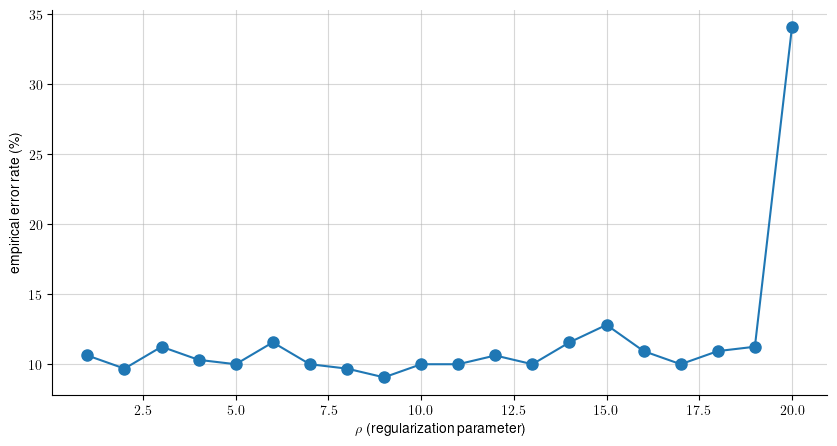

In [100]:
#fig 10 (cross-validation)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
plt.rcParams['figure.figsize']=10, 5
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
plt.plot(rho_vec, 100 * error_rho_final, "-o", markersize=8)
ax.spines[['right', 'top']].set_visible(False)
plt.grid(zorder=0, alpha=0.5)
ax.set_ylabel("empirical error rate (\%)", fontsize=10)
ax.set_xlabel("$\\rho$ (regularization parameter)", fontsize=10)

plt.savefig("figs/fig-10.pdf", format="pdf", bbox_inches="tight")

plt.show()

**Figure 63.10** The plot shows how the empirical error rate for the Gaussian-kernel based SVM solution (63.55) varies with the selection of the regularization parameter, $\rho$. A five-fold cross validation implementation is used to generate this curve.  

## Example 63.8 (Application to breast cancer dataset)

We reconsider the breast cancer dataset from Example 61.2. The data
consists of $N=569$ samples, with each sample corresponding to a benign or malignant cancer classification. We use $\gamma(n)=-1$ for benign samples and $\gamma(n)=+1$ for malignant samples. Each feature vector in the data contains $M=30$ attributes corresponding to measurements extracted from a digitized image of a  fine needle aspirate of a breast mass. The attributes describe characteristics of the cell nuclei present in the image; examples of these attributes were listed earlier in  
Table 53.1.
 
All feature vectors are centered around the sample mean and their variances scaled to unity according to the preprocessing step described earlier under PCA in (57.6). We apply the PCA procedure (57.34) to reduce the dimension of the feature space down to $M=2$. The resulting data samples are shown in 
Fig. 63.11. We select 456 samples for training and use the remaining 113 samples for testing. We run a kernel-based SVM implementation with $\rho=1$ and $\mu=0.05$ using $100$ runs over the data. Figure 63.12shows the separation curves that result from using three different values for the variance of the Gaussian kernel,  $\sigma^2\in\{0.1,1,25\}$.  Each row in the figure shows training samples on the left and test samples on the right, along with the separation  curve. Observe how smaller values for $\sigma^2$ lead to overfitting. For example, the choice $\sigma^2=0.1$ leads to a separation curve that tightly encircles class $\gamma=-1$ in the training data. Table 63.1 lists the resulting empirical errors on the test data for the three kernel variances. As expected, overfitting degrades the empirical error rate on test data.

In [107]:
# Applying soft-SVM to reduced two-dimension Breast Cancer data, with features centered and variance-normalized

print("BREAST CANCER DATA with two dimensional features....")

data = scipy.io.loadmat("data/breast_cancer_data_feature_dimension_2.mat")
features = data["A2"] # each row is a feature vector with 2 attributes
labels = data["labels2"] # each entry is +1 (malignant) or -1 (benign)
N = max(labels.shape) # 569 samples
M = min(features.shape) # 30 attributes per feature vector

Z_0 = (features[np.argwhere(labels.reshape(-1) == -1)]).reshape(-1, 2)
Z_1 = (features[np.argwhere(labels.reshape(-1) == 1)]).reshape(-1, 2)

BREAST CANCER DATA with two dimensional features....


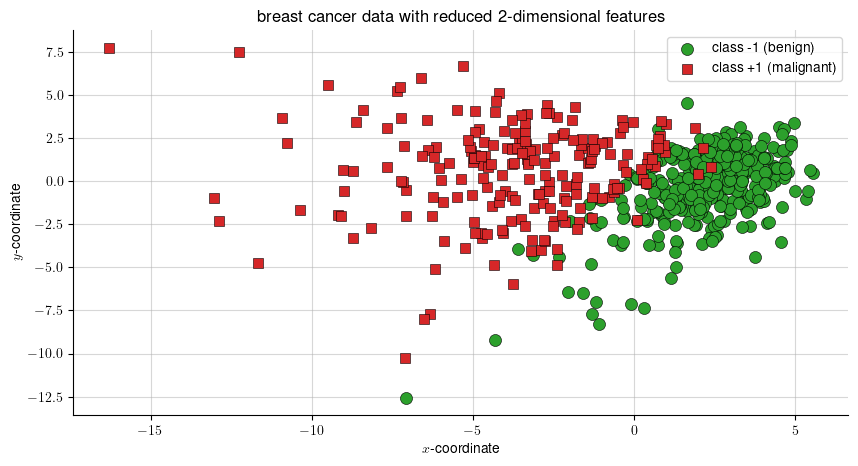

In [119]:
# figure 11 (breast cancer dataset)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
plt.rcParams['figure.figsize']=10, 5
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
ax.scatter(Z_0[:, 0], Z_0[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class -1 (benign)")
ax.scatter(Z_1[:, 0], Z_1[:, 1], zorder=3, c="tab:red", edgecolor="black", linewidth=0.4, s=50, label="class +1 (malignant)", marker="s")
ax.spines[['right', 'top']].set_visible(False)
plt.grid(zorder=0, alpha=0.5)
ax.set_ylabel("$y$-coordinate", fontsize=10)
ax.set_xlabel("$x$-coordinate", fontsize=10)
ax.set_title("breast cancer data with reduced 2-dimensional features", fontsize=12)
plt.legend()

plt.savefig("figs/fig-11.pdf", format="pdf", bbox_inches="tight")

plt.show()

**Figure 63.11** The plot shows $N=569$ data samples for two-dimensional reduced feature vectors from a breast cancer dataset. 

In [186]:
# Running KERNEL-BASED SVM on breast cancer data
B3 = np.concatenate([features, labels], axis=-1)

N = max(B3.shape) # total number of data points
N_test = round(0.2*N) # number of test data separated for testing (20%)
B3_test = B3[N-N_test:N]
B3_label_test = B3_test[:, 2]
B3_train = B3[:N-N_test]
B3_label_train = B3_train[:, 2]
N_train = max(B3_train.shape)

rho = 1
mu = 0.05
sig = np.array([0.1, 1, 25]) # we will test three variances for the Gaussian Kernel: 0.1, 1 and 10

# first sigma
sigma2 = sig[0] # variance gaussia kernel
q = np.zeros(N_train)
t = np.zeros(N_train)

time = 0
number_of_passes = 100 # number of passes over data

P = np.arange(N_train) # first pass
for p in tqdm(range(number_of_passes)):
    for n in range(N_train):
        hn = B3_train[P[n], :2] # original 2-dimensional feature vector
        gamma = B3_train[P[n], 2] # its class
        sum_ = 0
        for m in range(N_train):
            hm = B3_train[m, :2] # feature vector (it is a 1x2 row here)
            gamma_m = B3_train[m, 2]
            r = 1/(2*sigma2)
            r = r*(np.linalg.norm(hn-hm, 2)**2)
            K = np.exp(-r) # Gaussian Kernel
            sum_ += mu*gamma_m*(t[m]+q[m]*K)
        gamma_hat = sum_
        q[P[n]] = (1-mu*rho)*q[P[n]]
        if gamma*gamma_hat <= 1:
            q[P[n]] += 1
            t[P[n]] += 1
        time += 1
    P = np.random.permutation(N_train)

error = 0
for n in range(N_test):
    hn = B3_test[n, :2] # feature vector
    gamma = B3_test[n, 2] # its class
    sum_ = 0
    for m in range(N_train):
        hm = B3_train[m, :2] # feature vector (it is a row here extended by adding one)
        gamma_m = B3_train[m, 2]
        r = 1/(2*sigma2)
        r = r*(np.linalg.norm(hn-hm, 2)**2)
        K = np.exp(-r) # Gaussian Kernel
        sum_ += mu*gamma_m*(t[m] + q[m]*K)
    gamma_hat = sum_ 
    if gamma*gamma_hat <= 0:
        error += 1

print("breast cancer data with 2-dimensional reduced feature vectors")
print("Empirical error rate for Kernel-based SVM on test data (%):", (error/N_test)*100)
print("sigma:", sigma2)

# Generating the separating curve
rr = 0
z1_range_1 = np.arange(-17, 7, 0.2)
z2_range_1 = np.arange(-13, 8, 0.2)

surf8_1 = np.zeros((z1_range_1.shape[0]*z2_range_1.shape[0], 3))

for z1 in z1_range_1:
    for z2 in z2_range_1:
        sum_ = 0
        h = np.array([z1, z2])
        for n in range(N_train):
            hn = B3_train[n, :2] # feature vector (it is a row here and extended by adding one)
            gamma_n = B3_train[n, 2]
            r = 1/(2*sigma2)
            r = r*(np.linalg.norm(h-hn, 2)**2)
            K = np.exp(-r) # Gaussian Kernel
            sum_ += mu*gamma_n*(t[n]+q[n]*K)
        surf8_1[rr] = np.array([z1, z2, sum_])
        rr += 1 # row index

N = max(B3_train.shape)
C = B3_train[:, 2] # color map
C_test = B3_test[:, 2]

B3_1_train_0 = (B3_train[np.argwhere(C.reshape(-1) == -1)]).reshape(-1, 3)
B3_1_train_1 = (B3_train[np.argwhere(C.reshape(-1) == 1)]).reshape(-1, 3)

B3_1_test_0 = (B3_test[np.argwhere(C_test.reshape(-1) == -1)]).reshape(-1, 3)
B3_1_test_1 = (B3_test[np.argwhere(C_test.reshape(-1) == 1)]).reshape(-1, 3)

Z1grid_1, Z2grid_1 = np.meshgrid(z1_range_1, z2_range_1)

100%|██████████| 100/100 [01:44<00:00,  1.04s/it]


breast cancer data with 2-dimensional reduced feature vectors
Empirical error rate for Kernel-based SVM on test data (%): 9.649122807017543
sigma: 0.1


In [187]:
# Running KERNEL-BASED SVM on breast cancer data
B3 = np.concatenate([features, labels], axis=-1)

N = max(B3.shape) # total number of data points
N_test = round(0.2*N) # number of test data separated for testing (20%)
B3_test = B3[N-N_test:N]
B3_label_test = B3_test[:, 2]
B3_train = B3[:N-N_test]
B3_label_train = B3_train[:, 2]
N_train = max(B3_train.shape)

rho = 1
mu = 0.05
sig = np.array([0.1, 1, 25]) # we will test three variances for the Gaussian Kernel: 0.1, 1 and 10

# first sigma
sigma2 = sig[1] # variance gaussia kernel
q = np.zeros(N_train)
t = np.zeros(N_train)

time = 0
number_of_passes = 100 # number of passes over data

P = np.arange(N_train) # first pass
for p in tqdm(range(number_of_passes)):
    for n in range(N_train):
        hn = B3_train[P[n], :2] # original 2-dimensional feature vector
        gamma = B3_train[P[n], 2] # its class
        sum_ = 0
        for m in range(N_train):
            hm = B3_train[m, :2] # feature vector (it is a 1x2 row here)
            gamma_m = B3_train[m, 2]
            r = 1/(2*sigma2)
            r = r*(np.linalg.norm(hn-hm, 2)**2)
            K = np.exp(-r) # Gaussian Kernel
            sum_ += mu*gamma_m*(t[m]+q[m]*K)
        gamma_hat = sum_
        q[P[n]] = (1-mu*rho)*q[P[n]]
        if gamma*gamma_hat <= 1:
            q[P[n]] += 1
            t[P[n]] += 1
        time += 1
    P = np.random.permutation(N_train)

error = 0
for n in range(N_test):
    hn = B3_test[n, :2] # feature vector
    gamma = B3_test[n, 2] # its class
    sum_ = 0
    for m in range(N_train):
        hm = B3_train[m, :2] # feature vector (it is a row here extended by adding one)
        gamma_m = B3_train[m, 2]
        r = 1/(2*sigma2)
        r = r*(np.linalg.norm(hn-hm, 2)**2)
        K = np.exp(-r) # Gaussian Kernel
        sum_ += mu*gamma_m*(t[m] + q[m]*K)
    gamma_hat = sum_ 
    if gamma*gamma_hat <= 0:
        error += 1

print("breast cancer data with 2-dimensional reduced feature vectors")
print("Empirical error rate for Kernel-based SVM on test data (\%):", (error/N_test)*100)
print("sigma:", sigma2)

# Generating the separating curve
rr = 0
z1_range_2 = np.arange(-17, 7, 0.2)
z2_range_2 = np.arange(-13, 8, 0.2)

surf8_2 = np.zeros((z1_range_2.shape[0]*z2_range_2.shape[0], 3))

for z1 in z1_range_2:
    for z2 in z2_range_2:
        sum_ = 0
        h = np.array([z1, z2])
        for n in range(N_train):
            hn = B3_train[n, :2] # feature vector (it is a row here and extended by adding one)
            gamma_n = B3_train[n, 2]
            r = 1/(2*sigma2)
            r = r*(np.linalg.norm(h-hn, 2)**2)
            K = np.exp(-r) # Gaussian Kernel
            sum_ += mu*gamma_n*(t[n]+q[n]*K)
        surf8_2[rr] = np.array([z1, z2, sum_])
        rr += 1 # row index

N = max(B3_train.shape)
C = B3_train[:, 2] # color map
C_test = B3_test[:, 2]

B3_2_train_0 = (B3_train[np.argwhere(C.reshape(-1) == -1)]).reshape(-1, 3)
B3_2_train_1 = (B3_train[np.argwhere(C.reshape(-1) == 1)]).reshape(-1, 3)

B3_2_test_0 = (B3_test[np.argwhere(C_test.reshape(-1) == -1)]).reshape(-1, 3)
B3_2_test_1 = (B3_test[np.argwhere(C_test.reshape(-1) == 1)]).reshape(-1, 3)

Z1grid_2, Z2grid_2 = np.meshgrid(z1_range_2, z2_range_2)

100%|██████████| 100/100 [01:42<00:00,  1.03s/it]


breast cancer data with 2-dimensional reduced feature vectors
Empirical error rate for Kernel-based SVM on test data (\%): 3.508771929824561
sigma: 1.0


In [188]:
# Running KERNEL-BASED SVM on breast cancer data
B3 = np.concatenate([features, labels], axis=-1)

N = max(B3.shape) # total number of data points
N_test = round(0.2*N) # number of test data separated for testing (20%)
B3_test = B3[N-N_test:N]
B3_label_test = B3_test[:, 2]
B3_train = B3[:N-N_test]
B3_label_train = B3_train[:, 2]
N_train = max(B3_train.shape)

rho = 1
mu = 0.05
sig = np.array([0.1, 1, 25]) # we will test three variances for the Gaussian Kernel: 0.1, 1 and 10

# first sigma
sigma2 = sig[2] # variance gaussia kernel
q = np.zeros(N_train)
t = np.zeros(N_train)

time = 0
number_of_passes = 100 # number of passes over data

P = np.arange(N_train) # first pass
for p in tqdm(range(number_of_passes)):
    for n in range(N_train):
        hn = B3_train[P[n], :2] # original 2-dimensional feature vector
        gamma = B3_train[P[n], 2] # its class
        sum_ = 0
        for m in range(N_train):
            hm = B3_train[m, :2] # feature vector (it is a 1x2 row here)
            gamma_m = B3_train[m, 2]
            r = 1/(2*sigma2)
            r = r*(np.linalg.norm(hn-hm, 2)**2)
            K = np.exp(-r) # Gaussian Kernel
            sum_ += mu*gamma_m*(t[m]+q[m]*K)
        gamma_hat = sum_
        q[P[n]] = (1-mu*rho)*q[P[n]]
        if gamma*gamma_hat <= 1:
            q[P[n]] += 1
            t[P[n]] += 1
        time += 1
    P = np.random.permutation(N_train)

error = 0
for n in range(N_test):
    hn = B3_test[n, :2] # feature vector
    gamma = B3_test[n, 2] # its class
    sum_ = 0
    for m in range(N_train):
        hm = B3_train[m, :2] # feature vector (it is a row here extended by adding one)
        gamma_m = B3_train[m, 2]
        r = 1/(2*sigma2)
        r = r*(np.linalg.norm(hn-hm, 2)**2)
        K = np.exp(-r) # Gaussian Kernel
        sum_ += mu*gamma_m*(t[m] + q[m]*K)
    gamma_hat = sum_ 
    if gamma*gamma_hat <= 0:
        error += 1

print("breast cancer data with 2-dimensional reduced feature vectors")
print("Empirical error rate for Kernel-based SVM on test data (\%):", (error/N_test)*100)
print("sigma:", sigma2)

# Generating the separating curve
rr = 0
z1_range_3 = np.arange(-17, 7, 0.2)
z2_range_3 = np.arange(-13, 8, 0.2)

surf8_3 = np.zeros((z1_range_3.shape[0]*z2_range_3.shape[0], 3))

for z1 in z1_range_3:
    for z2 in z2_range_3:
        sum_ = 0
        h = np.array([z1, z2])
        for n in range(N_train):
            hn = B3_train[n, :2] # feature vector (it is a row here and extended by adding one)
            gamma_n = B3_train[n, 2]
            r = 1/(2*sigma2)
            r = r*(np.linalg.norm(h-hn, 2)**2)
            K = np.exp(-r) # Gaussian Kernel
            sum_ += mu*gamma_n*(t[n]+q[n]*K)
        surf8_3[rr] = np.array([z1, z2, sum_])
        rr += 1 # row index

N = max(B3_train.shape)
C = B3_train[:, 2] # color map
C_test = B3_test[:, 2]

B3_3_train_0 = (B3_train[np.argwhere(C.reshape(-1) == -1)]).reshape(-1, 3)
B3_3_train_1 = (B3_train[np.argwhere(C.reshape(-1) == 1)]).reshape(-1, 3)

B3_3_test_0 = (B3_test[np.argwhere(C_test.reshape(-1) == -1)]).reshape(-1, 3)
B3_3_test_1 = (B3_test[np.argwhere(C_test.reshape(-1) == 1)]).reshape(-1, 3)

Z1grid_3, Z2grid_3 = np.meshgrid(z1_range_3, z2_range_3)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [01:44<00:00,  1.04s/it]


breast cancer data with 2-dimensional reduced feature vectors
Empirical error rate for Kernel-based SVM on test data (\%): 4.385964912280701
sigma: 25.0


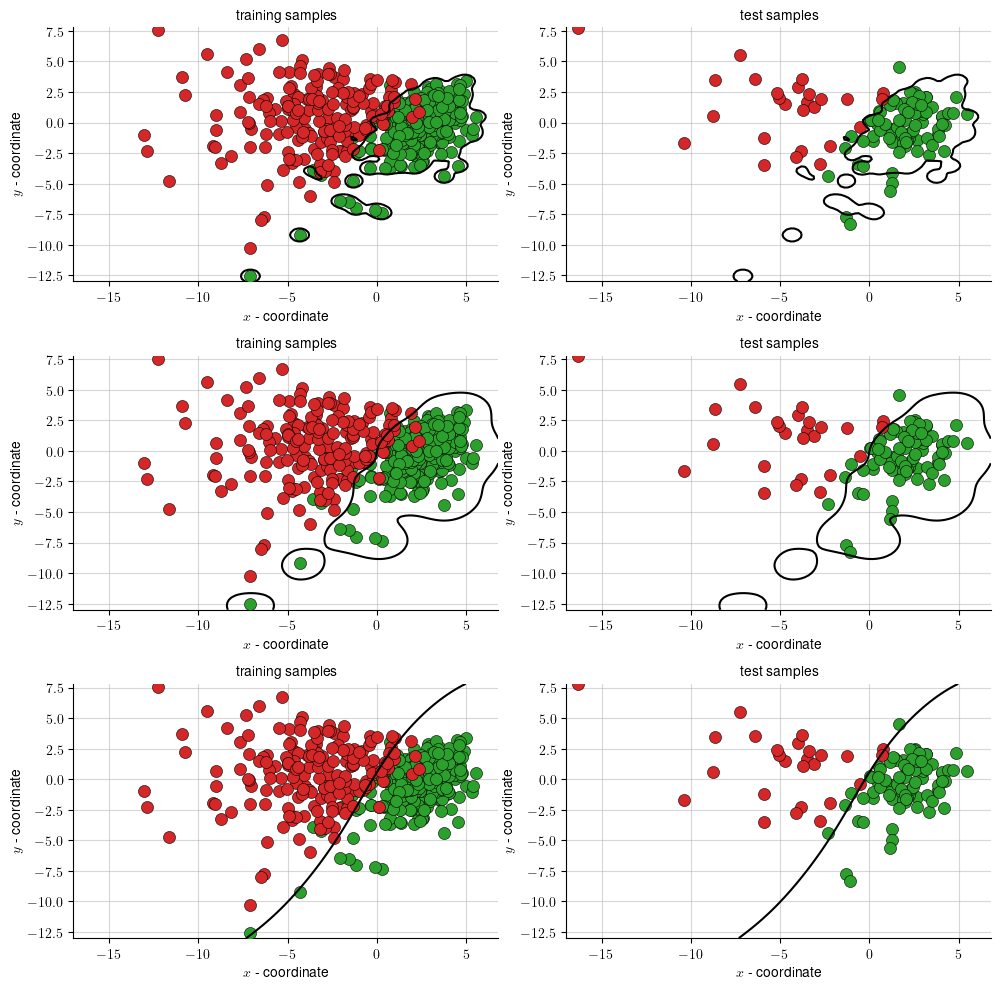

In [189]:
# figure 12

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=10, 10
fig = plt.figure()

ax = fig.add_subplot(321)
ax.scatter(B3_1_train_0[:, 0], B3_1_train_0[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class -1")
ax.scatter(B3_1_train_1[:, 0], B3_1_train_1[:, 1], zorder=3, c="tab:red", edgecolor="black", linewidth=0.4, s=75, label="class +1")
plt.contour(Z1grid_1, Z2grid_1, surf8_1[:, 2].reshape(Z2grid_1.shape, order="F"), levels=0, colors="black", zorder=4, linestyles="solid")
ax.set_xlabel("$x$ - coordinate", fontsize=10)
ax.set_ylabel("$y$ - coordinate", fontsize=10)
ax.set_title("training samples", fontsize=10)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(322)
ax.scatter(B3_1_test_0[:, 0], B3_1_test_0[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class -1")
ax.scatter(B3_1_test_1[:, 0], B3_1_test_1[:, 1], zorder=3, c="tab:red", edgecolor="black", linewidth=0.4, s=75, label="class +1")
plt.contour(Z1grid_1, Z2grid_1, surf8_1[:, 2].reshape(Z2grid_1.shape, order="F"), levels=0, colors="black", zorder=4, linestyles="solid")
ax.set_xlabel("$x$ - coordinate", fontsize=10)
ax.set_ylabel("$y$ - coordinate", fontsize=10)
ax.set_title("test samples", fontsize=10)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(323)
ax.scatter(B3_2_train_0[:, 0], B3_2_train_0[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class -1")
ax.scatter(B3_2_train_1[:, 0], B3_2_train_1[:, 1], zorder=3, c="tab:red", edgecolor="black", linewidth=0.4, s=75, label="class +1")
plt.contour(Z1grid_2, Z2grid_2, surf8_2[:, 2].reshape(Z2grid_2.shape, order="F"), levels=0, colors="black", zorder=4, linestyles="solid")
ax.set_xlabel("$x$ - coordinate", fontsize=10)
ax.set_ylabel("$y$ - coordinate", fontsize=10)
ax.set_title("training samples", fontsize=10)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(324)
ax.scatter(B3_2_test_0[:, 0], B3_2_test_0[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class -1")
ax.scatter(B3_2_test_1[:, 0], B3_2_test_1[:, 1], zorder=3, c="tab:red", edgecolor="black", linewidth=0.4, s=75, label="class +1")
plt.contour(Z1grid_2, Z2grid_2, surf8_2[:, 2].reshape(Z2grid_1.shape, order="F"), levels=0, colors="black", zorder=4, linestyles="solid")
ax.set_xlabel("$x$ - coordinate", fontsize=10)
ax.set_ylabel("$y$ - coordinate", fontsize=10)
ax.set_title("test samples", fontsize=10)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(325)
ax.scatter(B3_3_train_0[:, 0], B3_3_train_0[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class -1")
ax.scatter(B3_3_train_1[:, 0], B3_3_train_1[:, 1], zorder=3, c="tab:red", edgecolor="black", linewidth=0.4, s=75, label="class +1")
plt.contour(Z1grid_3, Z2grid_3, surf8_3[:, 2].reshape(Z2grid_3.shape, order="F"), levels=0, colors="black", zorder=4, linestyles="solid")
ax.set_xlabel("$x$ - coordinate", fontsize=10)
ax.set_ylabel("$y$ - coordinate", fontsize=10)
ax.set_title("training samples", fontsize=10)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(326)
ax.scatter(B3_3_test_0[:, 0], B3_3_test_0[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class -1")
ax.scatter(B3_3_test_1[:, 0], B3_3_test_1[:, 1], zorder=3, c="tab:red", edgecolor="black", linewidth=0.4, s=75, label="class +1")
plt.contour(Z1grid_3, Z2grid_3, surf8_3[:, 2].reshape(Z2grid_1.shape, order="F"), levels=0, colors="black", zorder=4, linestyles="solid")
ax.set_xlabel("$x$ - coordinate", fontsize=10)
ax.set_ylabel("$y$ - coordinate", fontsize=10)
ax.set_title("test samples", fontsize=10)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

plt.tight_layout()

plt.savefig("figs/fig-12.pdf", format="pdf", bbox_inches="tight")


plt.show()

**Figure 63.12** Each row in the figure shows training samples on the left and test samples on the right, along with the separation curves that result from applying a soft-SVM kernel implementation for different values of the variance parameter for the Gaussian kernel, namely,  $\sigma^2\in\{0.1,1,25\}$.